---
    
<h1><center>Machine Learning Models and Predictive Analysis</center></h1>    

<h3><center>Laura Lazarescou, John Rodgers, Maysam Mansor and Mel Schwan</center></h3>

<h3><center>March 1, 2021</center></h3>

---


# **Introduction**

All machine learning models are categorized as either supervised or unsupervised. Supervised learning involves learning a function that maps an input to an output based on example input-output pairs. Supervised models are then sub-categorized as a regression or classification model. In regression models, the result is continuous. Linear regression is merely finding a line that best fits the data. Decision trees are a popular model used in operations research, strategic planning, and machine learning. The last node of the decision tree, where a decision is made, is called the tree leaves. (Terence Shin - towards data science, 2020)

Extreme Gradient Boosting is a model that creates a partition tree to make predictions on class-level outcomes using data subsets. New, subsequent partition trees are applied to the remaining batches of the dataset until residual error is minimized. The weight of each sample batch is adaptively changed after each round of boosting (new tree). The model focuses on building trees to correctly explain data contributing to incorrect classifications. This is repeated until optimal performance is obtained. However, XGBoost is prone to over-fitting.

Support Vector Machine, is a supervised classification technique that can get pretty complicated but is intuitive at the most fundamental level. A support vector machine will find a hyperplane or a boundary between the the classes of data that maximizes the margin between the the classes. Many planes can separate the classes, but only one plane can maximize the margin or distance between the classes. This plane becomes the optimal solution for the model.

The third model type, Random Forest, is an ensemble learning technique that builds off of decision trees. Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each decision tree step. Relying on a "majority wins" model reduces the risk of error from an individual tree.

We will train all three models in this study and vary the hyperparameters to maximize the models' accuracy values and minimize log-loss while considering the runtime requirements.


 

# **Methods**

## **Data Preparation**

Financial data, containing 538 features and a binary target are the corpus used for this study. There were no feature descriptions included. The features were labeled with non-descriptive letters like v1, v2 etc.

Our prepared dataset included 538 features once we applied one-hot encoding and categorical transformation to all non-numeric factors.  

Factor v22 received exceptional treatment since it included over 18000 unique character values.  Using a grouping approach, we categorized v22 into 53 factors based on the rationale that a value should have at least 125 occurrences to be represented in the dataset.  If we had one-hot encoded v22 without this transformation, our final dataset would have included more than 19000 factors and it would have caused the feature space to grow intractably. 

Sparce matrices can lead to poor models and results. Thus we have choosen to reduce the model feature set to the most impactful factors.


### **Data Types and Data Distribution**

The majority of our original factors were numeric.  These factors are naturally compatible with machine learning models that we have used in this study.  Figure 1 shows the unique values counts of non-numeric features, except for factor v22.  It was removed from this plot because of its large number of unique values (18,210). v56 feature has the next greatest number of unique values.(125)

![](./images/feature_unique.png)

<h4><center>Unique Value Count per Non-Numeric Feature (excluding v22) (Figure 1)</center></h4>

## **Model Validation**

The models were validated using five(5)-fold cross-validation.
The steps for model validation are given below.  Hyperameter tuning procedures and choices are discussed in each Model Discussion.


**Model Validation Procedure**

* Split data into 67% training and 33% test sets.  The train dataset consisted of 76595 rows and the test dataset included 37726 rows.  Both datasets included 538 factors.  

* Use the train dataset with cross-validation to build multiple models of each type.

* Estimate the log-loss of XGBoost and Random Forest models, and the accuracy for all models by using the test dataset as a validation dataset, then comparing the predicted target values to the known target values.

* Statistics and performance of each model are listed in Results.



## **Models**

In this case study, we use XGBoost, Support Vector Machines, and Random Forest to model the data.
In each section we will desrcibe how these models work, and what steps were taking to tune each model.

### **Extreme Gradient Boosting**

Extreme Gradient Boosting (XGBoost) is laser focused on computational speed and model performance. (Jason Brownlee; 2016, machine learning mastery)

#### **Model Features** 

Three main forms of gradient boosting are supported:

* Gradient Boosting algorithm also called gradient boosting machine including the learning rate.

* Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels.

* Regularized Gradient Boosting with both L1 and L2 regularization.

#### **Algorithm Features** 

Some key algorithm implementation features include:

* Sparse Aware implementation with automatic handling of missing data values.

* Block Structure to support the parallelization of tree construction.

* Continued Training so that you can further boost an already fitted model on new data.



#### **XGBoost Hyperparameter Tuning**

To find an optimal combination of hyperparameters for an XGBoost model, a randomized search of combinations was performed to identify the best performing model based on the value of log loss. Each of these hyperparameter combinations was evaluated using 5-fold cross validation of the training data set. The following hyper-paramaters and values were incorporated into the randomized grid search. (Table 1)


| Hyperparameter | Values |   
| ----------------- | --------------------------------- |              
| max_depth | 6, 10, 15, 20 |
| learning_rate | 0.001, 0.01, 0.1, 0.2, 0.3 |
| subsample | 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 |
| colsample_bytree | 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 |
| colsample_bylevel | 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 |
| min_child_weight | 0.5, 1.0, 3.0, 5.0, 7.0, 10.0 |
| gamma | 0, 0.25, 0.5, 1.0 |
| reg_lambda | 0.1, 1.0, 5.0, 10.0, 50.0, 100.0 |

<h4><center>Table 1</center></h4>

The search model selected 5 hyperparameter combinations at random from the list above. With each of these 5 models being evaluated with a 5 cross-fold cross-validation, a total of 25 models were evaluated to determine the best-performing combination of hyperparameters. Log loss was used to identify the best-performing model, with the following combination of hyperparameters returning a log-loss value of 0.4691 and an accuracy score of 0.7683. (Table 2)


| Hyperparameter | Value |   
| ----------------- | ------ |  
| max_depth | 10
| learning_rate | 0.1 |
| subsample | 0.9 |
| colsample_bytree | 0.5 |
| colsample_bylevel | 0.4 |
| min_child_weight | 7.0 |
| gamma | 0.5 |
| reg_lambda | 10.0 |

<h4><center>Table 2</center></h4>




Additional metrics for the tuned XGBoost model were also evaluated. The following figure shows the actual classes of the test data compared to the value that the model predicted. (Figure 2)


![](./images/XGB_Class_Prediction_Error_sm.png)

<h4><center>XGB Class Prediction (Figure 2)</center></h4>



The figure below shows the precision, recall, and f1 score for each of the two classes. (Figure 3)


![](./images/XGB_Classification_Report_sm.png)

<h4><center>XGB Classification Report (Figure 3)</center></h4>

### **Support Vector Machine**

TA support vector machine is a supervised learning algorithm that sorts data into two categories. It is trained with a series of data already classified into two categories, building the model as it is initially trained. The task of an SVM algorithm is to determine which category a new data point belongs in. This makes SVM a kind of non-binary linear classifier.

An SVM algorithm should not only place objects into categories, but have the margins between them on a graph as wide as possible.

#### **Advantages:**

* Works relatively well when there is a clear margin of separation between classes

* More effective in high dimensional spaces

* Effective in cases where the number of dimensions is greater than the number of samples

* Relatively memory efficient

#### **Disadvantages:**

* Algorithm is not suitable for large data sets

* Does not perform very well when the data set has more noise i.e. target classes are overlapping

* In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform

* Works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification

Estimating the SVM in these high-dimensional spaces is considerably computationally expensive. Consider the model complexity when determining whether SVM should be implemented.



#### **SVM Hyperparameter Tuning**

Hyperparameters were selected with a randomized search.GridSearchCV is a library functions that is a member of sklearn's model_selection package. It loop through predefined Hyperparameter and fit the model on the training set.In the end best parameteres from the list of hyperparameteres can be selected. In our LinearSVC we evaluated hyperparameteres(C,loss,penalty,dual and tol,max_iter) and set a range for each and at the end we got accuracy of 0.77 with best parametereswere selected and tabulated in the table which gained 0.001 for C, squared_hinge for param_loss and with param_dual become False, tol =1e-05 with 100 max_iter with 872 sec long and finally with accuracy of 0.771137.
We also hypertuned LinearSVC for sample size 1000, 2000, 5000, 10000 and find out accuracy for each and time of fiting the model was calculated and reported respectively. We showed results of parameter tuning and accuracy in a coresponsing tables.

### **Random Forest**

A Random Forest is an emsemble model created from a collection of decision trees and bootstrapped aggregated (bagged) data (Breiman, 1996; James et al, 2013).
The following steps are used to create bagged trees:

  * bootstrap sample (repeated sampling with replacement) the dataset to create $B$ separate datasets.
  * fit a model $f^b(x)$ on each $B$ dataset.


The bagged decision tree model is the majority vote of the classifiers resulting in the class prediction.
Generally an ensemble should consist of a large number of decision trees.
The number of decision trees was used as a hyperparameter and we tuned it with cross-validation.


#### **Random Forest Hyperparameter Tuning**

For Random Forest we also used GridSearchCV to randomly select combinations of hyper parameters. Outside of the Grid, the value of n_iterations is one of the most influential parameters in Random Forest.  In our base model we chose n_iterations = 10 and ran it on the complete train dataset.

Below in figure 4 is a list of the default or base parameters used in our RF Base Model:

![](./images/RF_base_params.png)

<h4><center>Random Forest Base Parameters (Figure 4)</center></h4>

#### **Grid Parameter Options**

We did not include all possible parameters that could be tuned in our grid definition.  We also limited n_iterations to 5000 and in our results, the algorithm only chose 1000.  From this we learned that if one wants to test some extreme conditions or specific grid configurations, a random grid search may not be the best approach.  Figure 4 shows the grid parameters that could be chosen at random by the GridSearchCV function (Figure 5).

![](./images/RF_grid_params.png)

<h4><center>Random Forest Grid Parameters (Figure 5)</center></h4>

#### **Top Features**

We will not share the top features from all models that were run, however we did notice that the top ten features from different models were not consistent.  The feature importance graph in Figure 4 is difficult to read because there are so many features.  However, what it does show well is that no features has a significant percent of importance.  The top 10 features out of 508 features represent approximately 30% of the influence in the model.  This says that the variability of the model is high, and we have seen that in our different scenarios (Figure 6)

![](./images/RF_feature_importance.png)

<h4><center>Random Forest Feature Importance - All Features (Figure 6)</center></h4>

**Top Ten Features**

| Rank | Feature ID | Importances |
| ------------- | ------------------  | ----------  |
| 1. | feature 44 | (0.060483) |
| 2. | feature 11 | (0.027440) |
| 3. | feature 9 | (0.025312) |
| 4. | feature 96 | (0.024937) |
| 5. | feature 35 | (0.023831) |
| 6. | feature 20 | (0.023625) |
| 7. | feature 29 | (0.023525) |
| 8. | feature 13 | (0.022473) |
| 9. | feature 0 | (0.021958) |
| 10. | feature 338 | (0.006959) |

#### **Example Tree from our Random Forest Base Model"

The Figure below demonstrates a very small portion of the total Random Forest model.  In this example, we intentionally limited the max_depth of the tree to be able to visualize each element. (Figure 7)

![](./images/small_tree.png)
<h4><center>Random Forest Tree with max_depth=3 and n_iterations=10 (Figure 7)</center></h4>

# **Results**

## **Validation Results**

Model results are provided in Table 4.  Base models were constructed with the parameters that were provided by Dr. Slater.  Hypertuned models are listed by type and variation.  We were able to provide log-loss and accuracy for XGBoost and Random Forest.  SVM does not provide log-loss so it is excluded from the table.  In addition to log-loss and accuracy, we have provided timing or estimated timing for some models.  This allows us to evaluate the cost/accuracy trade-offs.

Of the Random Forest models, our best performer was also the most simple and took the least amount of processing time because we did not use RandomizedSearchCV.  The number of iterations for all randomized models was n_iter=5 and the best_params were all very similar between the different cases.  It's very possible that the default parameters just happened to be the best performing combination of tunable parameters for this dataset.  Given the relatively small amount of feature importance and the large number of features, it's also possible that the test dataset was very similar to the train dataset in its lack of correlation or internal trend.  Whatever the reason, we find that random forest outperforms the XGBoost and SVM models with this data. (Table 3)

| Model | Log-Loss | Accuracy | Wall Time (Seconds) |
| ------------- | ------------------  | ----------  | ----------- |
| XGBoost (Pre-Tuned Model) | 0.585068 |  0.768330 | 8 | 
| XGBoost (RandomizedSearchCV) | 0.469189 | 0.781848 | 1534 |
| SVM, Entire DSet|  NA |  0.7608   | 1179.79   | 
| SVM, For_1000  |  NA | 0.779    |13.2 |
| SVM, For_2000  |  NA | 0.4075     | 28.39 |
| SVM, For_5000  |  NA | 0.7662    |  71.83| 
| SVM, For_10000 |  NA | 0.7599     | 161.57 | 
| Random Forest Base  | 0.248184 | 0.927400 | 41 | 
| RF Tuned, 1000 Entries  | 0.483830 | 0.786000 | 120 | 
| RF Tuned, 5000 Entries  | 0.258795 | 0.917200 | 420 | 
| RF Tuned, Full Dataset  | 0.264958 | 0.913960  | 540 |

<h4><center>Table of Model Performance and Results (Table 3)</center></h4>

### AUC Comparisions for LinearSVC and Random Forest

Below in figure 1, is the comparision of the AUC performance for the LinearSVC and Random Forest model. This plot indicates that the Random Forest model trends towards more true positives than LinearSVC.decision_function (Figure 8)

![](./images/rf_svc_auc.png)
<h4><center>LinearSVC and Random Forest Model Comparisions (Figure 8)</center></h4>

# **Conclusion**



The best accuracy and log-loss values of our Random Forest (RF), Support Vector Machine (SVM), and XGBoost tuned models varied greatly depending on the hyperparameter tuning. Random Forest accuracy results were significantly higher than the other models. XGBoost and SVM were similar in their accuracy, but their execution time was significantly different.  The main difference between all models appeared in the compute time required to ensure these results. The log-loss values for XGBoost were also higher than Random Forest. This difference in the predicted probability from the actual value in XGBoost and Random Forest makes our choice less difficult if you have the computing power. Random Forest appears to be the best model for this type of data set.

SVM is a useful model for small data sets that are highly dimensional. If you have a Big Data corpus, then XGBoost would be a good model. Random Forest works with categorical features very well and can handle high dimensional spaces and large numbers of training examples.




# **References**

Terence Shin (2020), towards data science - All Machine Learning Models Explained in 6 Minutes

Breiman, L. (1996). Bagging Predictors. Machine Learning, 24, 123-140.

CJason Brownlee (2016), machine learning mastery - A Gentle Introduction to XGBoost for Applied Machine Learning.



<div style="page-break-after: always"></div>

# Appendix

## Code

In [3]:
import pandas as pd
import xgboost as xgb
import os
import time
import numpy as np
from sklearn.metrics import log_loss, accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import export_graphviz
from pprint import pprint

import math
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt  
from sklearn import model_selection

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import sklearn.feature_selection as fs
from sklearn.model_selection import cross_val_score

In [7]:
# Set Directory for image files - Comment out if you are not LL

import os
os.chdir('C:\\SMU_Local\\SMU_T5_QTW_CapA\\QTW_7333\\Unit 7 and 8\\case_study_81_2\\CS8')

In [8]:
os.getcwd()

'C:\\SMU_Local\\SMU_T5_QTW_CapA\\QTW_7333\\Unit 7 and 8\\case_study_81_2\\CS8'

### Load Data and Prepare for Modeling

In [4]:
# Load Data
# load data and separate target variable from dataset
train = pd.read_csv('Data/case_8.csv')
target = train['target']
train.drop(['target'],inplace=True, axis=1)

In [ ]:
pickle.dump(target, open("Pickle/target.pkl", "wb"))

In [5]:
# evaluate data types
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Data columns (total 132 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ID      int64  
 1   v1      float64
 2   v2      float64
 3   v3      object 
 4   v4      float64
 5   v5      float64
 6   v6      float64
 7   v7      float64
 8   v8      float64
 9   v9      float64
 10  v10     float64
 11  v11     float64
 12  v12     float64
 13  v13     float64
 14  v14     float64
 15  v15     float64
 16  v16     float64
 17  v17     float64
 18  v18     float64
 19  v19     float64
 20  v20     float64
 21  v21     float64
 22  v22     object 
 23  v23     float64
 24  v24     object 
 25  v25     float64
 26  v26     float64
 27  v27     float64
 28  v28     float64
 29  v29     float64
 30  v30     object 
 31  v31     object 
 32  v32     float64
 33  v33     float64
 34  v34     float64
 35  v35     float64
 36  v36     float64
 37  v37     float64
 38  v38     int64  
 39  v39     float64
 40  v

In [6]:
# isolate object data type columns
train_object_dtype_cols = train.select_dtypes(include='object')

In [7]:
# review head of object columns
train_object_dtype_cols.head()

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,G,AU
1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,FQ,E,C,A,C,F,AS,A,B,B,B,E,G,C,B,S,G,AE
3,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,G,CJ
4,C,HIT,E,C,A,I,H,BW,C,F,B,D,C,G,C,A,T,G,Z


In [8]:
# count unique values in object columns
train_object_dtype_cols.describe(include='all').loc['unique', :]


v3          3
v22     18210
v24         5
v30         7
v31         3
v47        10
v52        12
v56       122
v66         3
v71         9
v74         3
v75         4
v79        18
v91         7
v107        7
v110        3
v112       22
v113       36
v125       90
Name: unique, dtype: object

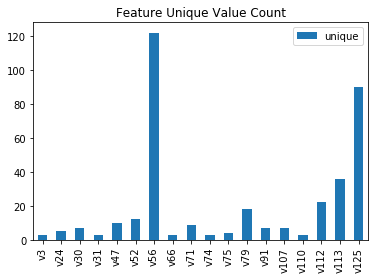

In [9]:
# count unique values without v22 in object columns and plot
unique_series = train_object_dtype_cols.describe(include='all').loc['unique', :]
unique_df = pd.DataFrame(unique_series)
unique_df = unique_df.drop(['v22'])
ax = unique_df.plot.bar(title='Feature Unique Value Count')

In [52]:
# EDA on v22 feature

v22_counts = train_object_dtype_cols.groupby('v22').v22.count()
v22_counts.describe()
v22_counts.median()
v22_counts[v22_counts>125].describe()

count      61.000000
mean      281.704918
std       431.560670
min       126.000000
25%       147.000000
50%       167.000000
75%       226.000000
max      2886.000000
Name: v22, dtype: float64

In [53]:
# Get counts of unique values in v22
val = train_object_dtype_cols['v22'].value_counts()
# identify values with counts > 125
y = val[val < 125].index
# replace values with count < 125 with NaN
train_object_dtype_cols['v22'] = train_object_dtype_cols['v22'].replace({x:math.nan for x in y})
# Output v22 information after removing values less than 125
train_object_dtype_cols.info()
train_object_dtype_cols.groupby('v22').v22.count().describe()

2021-02-28 22:04:04,974 [35816] WARNING  py.warnings:110: [JupyterRequire] C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   v3      114321 non-null  object
 1   v22     17184 non-null   object
 2   v24     114321 non-null  object
 3   v30     114321 non-null  object
 4   v31     114321 non-null  object
 5   v47     114321 non-null  object
 6   v52     114321 non-null  object
 7   v56     114321 non-null  object
 8   v66     114321 non-null  object
 9   v71     114321 non-null  object
 10  v74     114321 non-null  object
 11  v75     114321 non-null  object
 12  v79     114321 non-null  object
 13  v91     114321 non-null  object
 14  v107    114321 non-null  object
 15  v110    114321 non-null  object
 16  v112    114321 non-null  object
 17  v113    114321 non-null  object
 18  v125    114321 non-null  object
dtypes: object(19)
memory usage: 16.6+ MB


count      61.000000
mean      281.704918
std       431.560670
min       126.000000
25%       147.000000
50%       167.000000
75%       226.000000
max      2886.000000
Name: v22, dtype: float64

In [54]:
# one-hot encode remaining object columns
object_one_hot_df = pd.get_dummies(data=train_object_dtype_cols) 
# Output one-hot encodeing results
object_one_hot_df.info(verbose=True)
# get list of columns that were one-hot encoded
drop_cols = train_object_dtype_cols.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Data columns (total 425 columns):
 #   Column    Dtype
---  ------    -----
 0   v3_A      uint8
 1   v3_B      uint8
 2   v3_C      uint8
 3   v22_AAPP  uint8
 4   v22_ABF   uint8
 5   v22_ABOF  uint8
 6   v22_ACHJ  uint8
 7   v22_ACWE  uint8
 8   v22_ACXD  uint8
 9   v22_ADDF  uint8
 10  v22_ADGN  uint8
 11  v22_ADMI  uint8
 12  v22_ADMP  uint8
 13  v22_AFOZ  uint8
 14  v22_AFYU  uint8
 15  v22_AGDF  uint8
 16  v22_AGON  uint8
 17  v22_AGZT  uint8
 18  v22_AHE   uint8
 19  v22_AJQ   uint8
 20  v22_AMR   uint8
 21  v22_AWT   uint8
 22  v22_AXH   uint8
 23  v22_BLE   uint8
 24  v22_DJU   uint8
 25  v22_EJC   uint8
 26  v22_GBS   uint8
 27  v22_GEB   uint8
 28  v22_GEJ   uint8
 29  v22_HDD   uint8
 30  v22_HUU   uint8
 31  v22_HZE   uint8
 32  v22_JGY   uint8
 33  v22_KLZ   uint8
 34  v22_LIP   uint8
 35  v22_MNZ   uint8
 36  v22_MQE   uint8
 37  v22_NGS   uint8
 38  v22_NRT   uint8
 39  v22_NWG   uint8
 40  v

In [55]:
# drop one-hot encoded columns from dataframe
train = train.drop(drop_cols, axis=1)

In [56]:
# merge one-hot encoded columns to dataframe 
frames = [train, object_one_hot_df]
train = pd.concat(frames,axis=1)
# Output train dataframe 
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Data columns (total 538 columns):
 #   Column    Dtype  
---  ------    -----  
 0   ID        int64  
 1   v1        float64
 2   v2        float64
 3   v4        float64
 4   v5        float64
 5   v6        float64
 6   v7        float64
 7   v8        float64
 8   v9        float64
 9   v10       float64
 10  v11       float64
 11  v12       float64
 12  v13       float64
 13  v14       float64
 14  v15       float64
 15  v16       float64
 16  v17       float64
 17  v18       float64
 18  v19       float64
 19  v20       float64
 20  v21       float64
 21  v23       float64
 22  v25       float64
 23  v26       float64
 24  v27       float64
 25  v28       float64
 26  v29       float64
 27  v32       float64
 28  v33       float64
 29  v34       float64
 30  v35       float64
 31  v36       float64
 32  v37       float64
 33  v38       int64  
 34  v39       float64
 35  v40       float64
 36  v41      

In [19]:
# Save training set to pickle
pickle.dump(train, open("Pickle/train.pkl", "wb"))

In [20]:
# Load train pickle for consistent shared data across models
train = pickle.load( open("Pickle/train.pkl", "rb" ) )

In [22]:
# create test/train split of data and target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.33, random_state=42)

In [24]:
#### Save split train and test sets for consistant model testing and time savings.
pickle.dump(X_train, open("Pickle/X_train.pkl", "wb"))
pickle.dump(y_train, open("Pickle/y_train.pkl", "wb"))
pickle.dump(X_test, open("Pickle/X_test.pkl", "wb"))
pickle.dump(y_test, open("Pickle/y_test.pkl", "wb"))

In [111]:
#### Load split train and test sets for consistant model testing and time savings.
X_train = pickle.load( open("Pickle/X_train.pkl", "rb"))
y_train = pickle.load( open("Pickle/y_train.pkl", "rb"))
X_test = pickle.load( open("Pickle/X_test.pkl", "rb"))
y_test = pickle.load( open("Pickle/y_test.pkl", "rb"))

In [ ]:
##############################################################
# End of Data Preparation

# Begin Models
#################################################################

In [ ]:
##############################################################
# XGBoost Model
#################################################################

In [ ]:
# BEGIN JR XGB RANDOMIZED SEARCH

In [ ]:
# combine data into DMatrix for XGBoost
xgtrain = xgb.DMatrix(X_train.values, y_train.values)
xgtest = xgb.DMatrix(X_test.values, y_test.values)

In [ ]:
clf = xgb.XGBClassifier()

In [ ]:
param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

In [ ]:
xgb_rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=5,
                            n_jobs=-1, verbose=2, cv=5,
                            scoring='neg_log_loss', refit=True, random_state=123)

In [ ]:
import time
print("Randomized search..")
search_time_start = time.time()
xgb_rs_clf.fit(X_train, y_train)
xgb_rs_elapsed = time.time() - search_time_start
print("Randomized search time:", xgb_rs_elapsed)

In [ ]:
pickle.dump(xgb_rs_elapsed, open("xgb_rs_elapsed.pkl", "wb"))

In [ ]:
xgb_rs_elapsed = pickle.load( open("xgb_rs_elapsed.pkl", "rb" ) )

In [ ]:
pickle.dump(xgb_rs_clf, open("xgb_rs_clf.pkl", "wb"))

In [ ]:
xgb_rs_clf = pickle.load( open("xgb_rs_clf.pkl", "rb" ) )

In [ ]:
print('The best combination of parameters, based on an evaluation of log-loss is:')
xgb_rs_clf.best_params_

In [ ]:
best_params = xgb_rs_clf.best_params_

In [ ]:
print(f'The log-loss value for the best model is {round(xgb_rs_clf.best_score_ * -1,4)}.')

In [ ]:
results = pd.DataFrame(xgb_rs_clf.cv_results_)

In [ ]:
pickle.dump(results, open("results.pkl", "wb"))

In [ ]:
results = pickle.load( open("results.pkl", "rb" ) )

In [ ]:
results.iloc[xgb_rs_clf.best_index_]

In [ ]:
xgb_test_preds = xgb_rs_clf.predict(X_test)

In [ ]:
pickle.dump(xgb_test_preds, open("xgb_test_preds.pkl", "wb"))

In [ ]:
xgb_test_preds = pickle.load( open("xgb_test_preds.pkl", "rb" ) )

In [ ]:
print(accuracy_score(y_test,np.rint(xgb_test_preds)))

In [ ]:
results_summary = pd.DataFrame([['XGBoost', 'RandomSearchCV',xgb_rs_clf.best_score_ * -1,accuracy_score(y_test,np.rint(xgb_test_preds)),xgb_rs_elapsed ]],columns=['Model', 'Tuning', 'log loss', 'accuracy', 'time'])

In [ ]:
#####   END JR XGB RANDOMIZED SEARCH

In [ ]:
##### BEGIN JR XGB ORIGINAL EXAMPLE

In [ ]:
print('Fit the model...')
# XGBoost params:
xgboost_params = { 
   "objective": "binary:logistic",
   "booster": "gbtree",
   "eval_metric": "logloss",
   "eta": 0.01, 
   "subsample": 0.5,
   "colsample_bytree": 0.5,
   "max_depth": 3
}
boost_round = 50

xgb_clf_start = time.time()
xgb_clf = xgb.train(xgboost_params,xgtrain,num_boost_round=boost_round,verbose_eval=True,maximize=False)
xgb_clf_elapsed = time.time() - xgb_clf_start

In [ ]:
pickle.dump(xgb_clf_elapsed, open("xgb_clf_elapsed.pkl", "wb"))

In [ ]:
xgb_clf_elapsed = pickle.load( open("xgb_clf_elapsed.pkl", "rb" ) )

In [ ]:
#Make predict
print('Predict...')

xgb_test_preds_orig = clf.predict(xgtest, ntree_limit=clf.best_iteration)

# Save results

In [ ]:
pickle.dump(xgb_clf, open("xgb_clf.pkl", "wb"))

In [ ]:
xgb_clf = pickle.load( open("xgb_clf.pkl", "rb" ) )

In [ ]:
print(log_loss(y_test,xgb_test_preds_orig))
print(accuracy_score(y_test,np.rint(xgb_test_preds_orig)))

In [ ]:
results_summary = results_summary.append(pd.DataFrame([['XGBoost','Base',log_loss(y_test,xgb_test_preds_orig),accuracy_score(y_test,np.rint(xgb_test_preds_orig)), xgb_clf_elapsed ]],columns=['Model', 'Tuning', 'log loss', 'accuracy', 'time']))

In [ ]:
results_summary = results_summary.reset_index()

In [ ]:
results_summary

In [ ]:
pickle.dump(results_summary, open("jr_results_summary.pkl", "wb"))

In [ ]:
######  END XGB XGB ORIGINAL EXAMPLE

In [ ]:
##### BEGIN XGB VISUALIZATIONS

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

In [ ]:
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb_rs_clf.best_estimator_, num_trees=1, ax=ax)
plt.show()

In [ ]:
from yellowbrick.classifier import ClassificationReport, ClassPredictionError

In [ ]:
report = ClassificationReport(xgb_rs_clf, size=(1080, 720), classes=[0,1])

report.score(X_test, y_test)
c = report.poof()

In [ ]:
error = ClassPredictionError(xgb_rs_clf, size=(1080, 720), classes=[0,1])

error.score(X_test, y_test)
e = error.poof()

In [ ]:
#### END XGB VISUALIZATIONS

In [ ]:
##############################################################
# SVM model
#################################################################

In [146]:
#### Load split train and test sets for consistant model testing and time savings.
X_train = pickle.load( open("Pickle/X_train.pkl", "rb"))
y_train = pickle.load( open("Pickle/y_train.pkl", "rb"))
X_test = pickle.load( open("Pickle/X_test.pkl", "rb"))
y_test = pickle.load( open("Pickle/y_test.pkl", "rb"))

In [142]:
#####################
###   Original SVM Code from Dr. Slater with Added Timing
#########################################################


start = time.time()
#####################################
# WARNING THIS TAKES AN HOUR TO RUN #
# Using LinearSVC for faster returns#
#####################################

svm = LinearSVC(verbose=True, random_state=42)  
svm.fit(X_train, y_train)

end = time.time()
LinearSVC_time=round((end-start),2)
LinearSVC_time



[LibLinear]

2021-03-01 00:26:57,492 [35816] WARNING  py.warnings:110: [JupyterRequire] C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



55.44

In [144]:
# Predict using the model and Measure Accuracy

X_pred=svm.predict(X_test)

#from sklearn.metrics import accuracy_score
svm_base_accuracy = accuracy_score(y_test,X_pred)
print(svm_base_accuracy)


0.5046122037851879


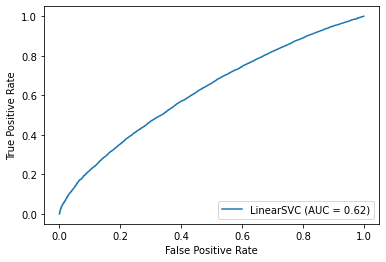

In [145]:
# Plot the SCM curve
svm_disp = plot_roc_curve(svm, X_test, y_test)

In [ ]:
########################
#### Begin MM CODE
#################################

In [ ]:
# FULL DATASET TUNED SVM MODEL
# Ignore to save time - Picked Models are available

# Gridsearch to determine the value of C
param_grid = {'C': [0.001,0.01,0.1],
              'loss': ['hinge', 'squared_hinge'],
              'penalty' : ['l2'],
              'dual' : [True,False],
              'tol': [0.00001,0.01], #0.0001 is the Default
              'max_iter': [100],
             }

SVC_Linear = LinearSVC(random_state=42)
CV_svc = GridSearchCV(estimator = SVC_Linear, param_grid=param_grid, cv= 5, n_jobs =-1,verbose=1)
Start=time.time()
CV_svc_mod = CV_svc.fit(X_train, y_train)
Stop=time.time()
Time1=Stop-Start
Time1
pkl_filename = "Pickle/CV_SVM_Linear.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(CV_svc_mod, file)

In [ ]:
Time1

In [112]:
# Load CV_svc_mod
#with open("C://Users/18322/OneDrive - Southern Methodist University/Desktop/QOW/week7/case study 8/case_study_81_2/CV_SVM_Linear.pkl", 'rb') as file:
#    CV_svc = pickle.load(file)

CV_svc_mod = pickle.load( open("Pickle/CV_SVM_Linear.pkl", "rb" ) )

In [113]:
svc_gridsearch = pd.DataFrame(CV_svc_mod.cv_results_)
svc_columns = [
    "param_C",
    "param_loss",
    "param_dual",
    "param_tol",
    "param_max_iter",
    "mean_fit_time",
    "mean_test_score",
    "rank_test_score"
    
]

In [114]:
svc_gridsearch[svc_columns].sort_values(by="rank_test_score").head(10)

,param_C,param_loss,param_dual,param_tol,param_max_iter,mean_fit_time,mean_test_score,rank_test_score
6,0.001,squared_hinge,False,1e-05,100,872.557506,0.771134,1
2,0.001,squared_hinge,True,1e-05,100,94.016914,0.771134,2
3,0.001,squared_hinge,True,0.01,100,77.806056,0.771134,2
7,0.001,squared_hinge,False,0.01,100,119.676386,0.771069,4
23,0.1,squared_hinge,False,0.01,100,145.308221,0.771029,5
14,0.01,squared_hinge,False,1e-05,100,1386.344374,0.771003,6
15,0.01,squared_hinge,False,0.01,100,269.671581,0.770990,7
22,0.1,squared_hinge,False,1e-05,100,1003.456923,0.770873,8
10,0.01,squared_hinge,True,1e-05,100,207.509046,0.770768,9
11,0.01,squared_hinge,True,0.01,100,214.311796,0.770768,9


In [ ]:
print('Best Accuracy:', CV_svc_mod.best_score_)

In [115]:
# Create Dataframe of 1000 Rows
Xtrain_1000 = pd.DataFrame.sample(X_train, n=1000, random_state=123)
ytrain_1000 = pd.DataFrame.sample(y_train,n=1000, random_state=123)
Xtest_1000 = pd.DataFrame.sample(X_test,n=1000, random_state=123)
ytest_1000 = pd.DataFrame.sample(y_test,n=1000, random_state=123)
print('Training Features 1000:', Xtrain_1000.shape)
print('Training Labels 1000:', ytrain_1000.shape)
print('Testing Features 1000:', Xtest_1000.shape)
print('Testing Labels 1000:', ytest_1000.shape)

Training Features 1000: (1000, 538)
Training Labels 1000: (1000,)
Testing Features 1000: (1000, 538)
Testing Labels 1000: (1000,)


In [137]:
#1000 Rows
# Gridsearch to determine the value of C
param_grid = {'C': [0.001,0.01,0.1],
              'loss': ['hinge', 'squared_hinge'],
              'penalty' : ['l2'],
              'dual' : [True,False],
              'tol': [0.00001,0.01], #0.0001 is the Default
              'max_iter': [100],
             }

SVC_Linear = LinearSVC(random_state=42)
CV_svc = GridSearchCV(estimator = SVC_Linear, param_grid=param_grid, cv= 5, n_jobs =-1,verbose=1)
Start=time.time()
CV_svc_mod_1000 = CV_svc.fit(Xtrain_1000, ytrain_1000)
Stop=time.time()
Time2=Stop-Start
Time2
pkl_filename = "Pickle/CV_SVM_Linear_1000.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(CV_svc_mod_1000, file)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.3s finished


In [ ]:
Time2

In [138]:
#1000 
#with open("C://Users/18322/OneDrive - Southern Methodist University/Desktop/QOW/week7/case study 8/case_study_81_2/CV_SVM_Linear_1000.pkl", 'rb') as file:
#    CV_svc = pickle.load(file)
    
CV_svc_mod_1000 = pickle.load( open("Pickle/CV_SVM_Linear_1000.pkl", "rb" ) )

In [139]:
svc_gridsearch = pd.DataFrame(CV_svc_mod_1000.cv_results_)
svc_columns = [
    "param_C",
    "param_loss",
    "param_dual",
    "param_tol",
    "param_max_iter",
    "mean_fit_time",
    "mean_test_score",
    "rank_test_score"
]

In [140]:
#for 1000 samples
svc_gridsearch[svc_columns].sort_values(by="rank_test_score").head(10)

,param_C,param_loss,param_dual,param_tol,param_max_iter,mean_fit_time,mean_test_score,rank_test_score
23,0.1,squared_hinge,False,0.01,100,0.044880,0.745,1
15,0.01,squared_hinge,False,0.01,100,0.087365,0.745,1
7,0.001,squared_hinge,False,0.01,100,0.058641,0.745,1
6,0.001,squared_hinge,False,1e-05,100,0.117089,0.740,4
14,0.01,squared_hinge,False,1e-05,100,0.164079,0.725,5
22,0.1,squared_hinge,False,1e-05,100,0.122875,0.711,6
10,0.01,squared_hinge,True,1e-05,100,0.158082,0.672,7
11,0.01,squared_hinge,True,0.01,100,0.165455,0.672,7
1,0.001,hinge,True,0.01,100,0.156181,0.661,9
0,0.001,hinge,True,1e-05,100,0.143215,0.661,9


In [ ]:
print('Best Accuracy:', CV_svc_mod_1000.best_score_)

In [121]:
#2000
# Create Dataframe of 2000 Rows
Xtrain_2000 = pd.DataFrame.sample(X_train, n=2000, random_state=123)
ytrain_2000 = pd.DataFrame.sample(y_train,n=2000, random_state=123)
Xtest_2000 = pd.DataFrame.sample(X_test,n=2000, random_state=123)
ytest_2000 = pd.DataFrame.sample(y_test,n=2000, random_state=123)
print('Training Features 2000:', Xtrain_2000.shape)
print('Training Labels 2000:', ytrain_2000.shape)
print('Testing Features 2000:', Xtest_2000.shape)
print('Testing Labels 2000:', ytest_2000.shape)

Training Features 2000: (2000, 538)
Training Labels 2000: (2000,)
Testing Features 2000: (2000, 538)
Testing Labels 2000: (2000,)


In [122]:
#2000 
# Gridsearch to determine the value of C
param_grid = {'C': [0.001,0.01,0.1],
              'loss': ['hinge', 'squared_hinge'],
              'penalty' : ['l2'],
              'dual' : [True,False],
              'tol': [0.00001,0.01], #0.0001 is the Default
              'max_iter': [100],
             }

SVC_Linear = LinearSVC(random_state=42)
CV_svc = GridSearchCV(estimator = SVC_Linear, param_grid=param_grid, cv= 5, n_jobs =-1,verbose=1)
Start=time.time()
CV_svc_mod_2000 = CV_svc.fit(Xtrain_2000, ytrain_2000)
Stop=time.time()
Time3=Stop-Start
Time3
pkl_filename = "Pickle/CV_SVM_Linear_2000.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(CV_svc_mod_2000, file)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   10.6s finished
2021-03-01 00:17:45,154 [35816] WARNING  py.warnings:110: [JupyterRequire] C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



In [ ]:
Time3

In [123]:
#2000
#with open("C://Users/18322/OneDrive - Southern Methodist University/Desktop/QOW/week7/case study 8/case_study_81_2/CV_SVM_Linear_2000.pkl", 'rb') as file:
#    CV_svc = pickle.load(file)
    
CV_svc_mod_2000 = pickle.load( open("Pickle/CV_SVM_Linear_2000.pkl", "rb" ) )

In [124]:
svc_gridsearch = pd.DataFrame(CV_svc_mod_2000.cv_results_)
svc_columns = [
    "param_C",
    "param_loss",
    "param_dual",
    "param_tol",
    "param_max_iter",
    "mean_fit_time",
    "mean_test_score",
    "rank_test_score"
]

In [126]:
svc_gridsearch[svc_columns].sort_values(by="rank_test_score").head(10)

,param_C,param_loss,param_dual,param_tol,param_max_iter,mean_fit_time,mean_test_score,rank_test_score
6,0.001,squared_hinge,False,1e-05,100,0.417046,0.7675,1
23,0.1,squared_hinge,False,0.01,100,0.132361,0.7650,2
15,0.01,squared_hinge,False,0.01,100,0.134945,0.7650,2
7,0.001,squared_hinge,False,0.01,100,0.139359,0.7650,2
14,0.01,squared_hinge,False,1e-05,100,0.567534,0.7630,5
22,0.1,squared_hinge,False,1e-05,100,0.492509,0.7600,6
19,0.1,squared_hinge,True,0.01,100,0.442345,0.7550,7
18,0.1,squared_hinge,True,1e-05,100,0.464916,0.7550,7
17,0.1,hinge,True,0.01,100,0.449724,0.7550,7
16,0.1,hinge,True,1e-05,100,0.507707,0.7550,7


In [ ]:
print('Best Accuracy:', CV_svc_mod_2000.best_score_)

In [127]:
#5000
# Create Dataframe of 5000 Rows
Xtrain_5000 = pd.DataFrame.sample(X_train, n=5000, random_state=123)
ytrain_5000 = pd.DataFrame.sample(y_train,n=5000, random_state=123)
Xtest_5000 = pd.DataFrame.sample(X_test,n=5000, random_state=123)
ytest_5000 = pd.DataFrame.sample(y_test,n=5000, random_state=123)
print('Training Features 5000:', Xtrain_5000.shape)
print('Training Labels 5000:', ytrain_5000.shape)
print('Testing Features 5000:', Xtest_5000.shape)
print('Testing Labels 5000:', ytest_5000.shape)

Training Features 5000: (5000, 538)
Training Labels 5000: (5000,)
Testing Features 5000: (5000, 538)
Testing Labels 5000: (5000,)


In [ ]:
# Gridsearch to determine the value of C
param_grid = {'C': [0.001,0.01,0.1],
              'loss': ['hinge', 'squared_hinge'],
              'penalty' : ['l2'],
              'dual' : [True,False],
              'tol': [0.00001,0.01], #0.0001 is the Default
              'max_iter': [100],
             }

SVC_Linear = LinearSVC(random_state=42)
CV_svc = GridSearchCV(estimator = SVC_Linear, param_grid=param_grid, cv= 5, n_jobs =-1,verbose=1)
Start=time.time()
CV_svc_mod_5000 = CV_svc.fit(Xtrain_5000, ytrain_5000)
Stop=time.time()
Time4=Stop-Start
Time4
pkl_filename = "Pickle/CV_SVM_Linear_5000.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(CV_svc_mod_5000, file)


In [ ]:
Time4

In [128]:
#with open("C://Users/18322/OneDrive - Southern Methodist University/Desktop/QOW/week7/case study 8/case_study_81_2/CV_SVM_Linear_5000.pkl", 'rb') as file:
#    CV_svc = pickle.load(file)
    
CV_svc_mod_5000 = pickle.load( open("Pickle/CV_SVM_Linear_5000.pkl", "rb" ) )

In [129]:
svc_gridsearch = pd.DataFrame(CV_svc_mod_5000.cv_results_)
svc_columns = [
    "param_C",
    "param_loss",
    "param_dual",
    "param_tol",
    "param_max_iter",
    "mean_fit_time",
    "mean_test_score",
    "rank_test_score"
]


In [130]:
svc_gridsearch[svc_columns].sort_values(by="rank_test_score").head(10)

,param_C,param_loss,param_dual,param_tol,param_max_iter,mean_fit_time,mean_test_score,rank_test_score
6,0.001,squared_hinge,False,1e-05,100,1.029846,0.7660,1
22,0.1,squared_hinge,False,1e-05,100,0.939270,0.7648,2
23,0.1,squared_hinge,False,0.01,100,0.230186,0.7648,3
15,0.01,squared_hinge,False,0.01,100,0.244742,0.7648,3
7,0.001,squared_hinge,False,0.01,100,0.227392,0.7648,3
14,0.01,squared_hinge,False,1e-05,100,1.177088,0.7646,6
0,0.001,hinge,True,1e-05,100,1.197936,0.6860,7
1,0.001,hinge,True,0.01,100,1.296276,0.6860,7
8,0.01,hinge,True,1e-05,100,1.226919,0.6544,9
9,0.01,hinge,True,0.01,100,1.168087,0.6544,9


In [ ]:
print('Best Accuracy:', CV_svc_mod_5000.best_score_)

In [131]:
#10000
# Create Dataframe of 10000 Rows
Xtrain_10000 = pd.DataFrame.sample(X_train, n=10000, random_state=123)
ytrain_10000 = pd.DataFrame.sample(y_train,n=10000, random_state=123)
Xtest_10000 = pd.DataFrame.sample(X_test,n=10000, random_state=123)
ytest_10000 = pd.DataFrame.sample(y_test,n=10000, random_state=123)
print('Training Features 10000:', Xtrain_10000.shape)
print('Training Labels 10000:', ytrain_10000.shape)
print('Testing Features 10000:', Xtest_10000.shape)
print('Testing Labels 10000:', ytest_10000.shape)

Training Features 10000: (10000, 538)
Training Labels 10000: (10000,)
Testing Features 10000: (10000, 538)
Testing Labels 10000: (10000,)


In [133]:
# Gridsearch to determine the value of C
param_grid = {'C': [0.001,0.01,0.1],
              'loss': ['hinge', 'squared_hinge'],
              'penalty' : ['l2'],
              'dual' : [True,False],
              'tol': [0.00001,0.01], #0.0001 is the Default
              'max_iter': [100],
             }

SVC_Linear = LinearSVC(random_state=42)
CV_svc = GridSearchCV(estimator = SVC_Linear, param_grid=param_grid, cv= 5, n_jobs =-1,verbose=1)
Start=time.time()
CV_svc_mod_10000 = CV_svc.fit(Xtrain_10000, ytrain_10000)
Stop=time.time()
Time5=Stop-Start
Time5
pkl_filename = "Pickle/CV_SVM_Linear_10000.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(CV_svc_mod_10000, file)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.0s finished


In [ ]:
Time5

In [134]:
#with open("C://Users/18322/OneDrive - Southern Methodist University/Desktop/QOW/week7/case study 8/case_study_81_2/CV_SVM_Linear_10000.pkl", 'rb') as file:
#    CV_svc = pickle.load(file)

CV_svc_mod_10000 = pickle.load( open("Pickle/CV_SVM_Linear_10000.pkl", "rb" ) )

In [135]:
svc_gridsearch = pd.DataFrame(CV_svc_mod_10000.cv_results_)
svc_columns = [
    "param_C",
    "param_loss",
    "param_dual",
    "param_tol",
    "param_max_iter",
    "mean_fit_time",
    "mean_test_score",
    "rank_test_score"
]

In [136]:
svc_gridsearch[svc_columns].sort_values(by="rank_test_score").head(10)

,param_C,param_loss,param_dual,param_tol,param_max_iter,mean_fit_time,mean_test_score,rank_test_score
14,0.01,squared_hinge,False,1e-05,100,1.248989,0.7686,1
22,0.1,squared_hinge,False,1e-05,100,1.117655,0.7686,1
6,0.001,squared_hinge,False,1e-05,100,1.184583,0.7679,3
23,0.1,squared_hinge,False,0.01,100,0.249406,0.7660,4
15,0.01,squared_hinge,False,0.01,100,0.241507,0.7660,4
7,0.001,squared_hinge,False,0.01,100,0.262091,0.7660,4
19,0.1,squared_hinge,True,0.01,100,1.260491,0.7656,7
18,0.1,squared_hinge,True,1e-05,100,1.278927,0.7656,7
10,0.01,squared_hinge,True,1e-05,100,1.309391,0.7652,9
11,0.01,squared_hinge,True,0.01,100,1.259128,0.7652,9


In [ ]:
print('Best Accuracy:', CV_svc_mod_10000.best_score_)

In [5]:
##############################################################
# Random Forest Model
#################################################################

In [6]:
#######################
# RF Base Model
########################

#from sklearn.ensemble import RandomForestClassifier

# Full Dataset used for Base Model.
# Default max_levels is None, so the tree is very large

rf_base = RandomForestClassifier(n_estimators=10, random_state=123 ) 

start = time.time()
rf_base.fit(X_train, y_train)

end = time.time()
rf_base_time=round((end-start),2)
rf_base_time

NameError: name 'RandomForestClassifier' is not defined

In [63]:
rf_base_preds = rf_base.predict_proba(X_test)

In [64]:
rf_base_log_loss = log_loss(y_test,rf_base_preds[:,1]) # each column is class probability, 
print(rf_base_log_loss)
rf_base_accuracy = accuracy_score(y_test,np.rint(rf_base_preds[:,1]))
print(rf_base_accuracy)

0.9337292313310098
0.7515241478025765


In [65]:
##############################################################
# Begin Hypertuning for Random Forest
#################################################################

In [66]:
# Citation:  Thank you to Will Koehrsen and Towards Data Science. RF Hypertuning code is borrowed from his example. 
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Note - different from tutorial, we are using rf=RandomForestClassifier(), not RandomForestRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters Used by Base Model:\n')
pprint(rf_base.get_params())

Parameters Used by Base Model:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}


In [67]:
# Define Random Grid Parameters and use RandomizedSearchCV to choose 
# different combinations of parameters for different sizes of datasets

#from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100,500,1000,1500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 100, 200,300,400,500,600,700,800,900,1000]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print('Random Grid Parameters:\n')
pprint(random_grid)

Random Grid Parameters:

{'bootstrap': [True, False],
 'max_depth': [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 500, 1000, 1500]}


In [68]:
# Adapt variable names for this example
train_features = X_train
train_labels = y_train
test_features = X_test
test_labels = y_test
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (76595, 538)
Training Labels Shape: (76595,)
Testing Features Shape: (37726, 538)
Testing Labels Shape: (37726,)


In [69]:
# Create Smaller Dataframe of 1000 Rows
train_features_1000 = pd.DataFrame.sample(X_train, n=1000, random_state=123)
train_labels_1000 = pd.DataFrame.sample(y_train,n=1000, random_state=123)
test_features_1000 = pd.DataFrame.sample(X_test,n=1000, random_state=123)
test_labels_1000 = pd.DataFrame.sample(y_test,n=1000, random_state=123)
print('Training Features 1000:', train_features_1000.shape)
print('Training Labels 1000:', train_labels_1000.shape)
print('Testing Features 1000:', test_features_1000.shape)
print('Testing Labels 1000:', test_labels_1000.shape)

Training Features 1000: (1000, 538)
Training Labels 1000: (1000,)
Testing Features 1000: (1000, 538)
Testing Labels 1000: (1000,)


In [70]:
# Create Medium DataFrame of 5000 Rows
train_features_5000 = pd.DataFrame.sample(X_train, n=5000, random_state=123)
train_labels_5000 = pd.DataFrame.sample(y_train,n=5000, random_state=123)
test_features_5000 = pd.DataFrame.sample(X_test,n=5000, random_state=123)
test_labels_5000 = pd.DataFrame.sample(y_test,n=5000, random_state=123)
print('Training Features 5000:', train_features_5000.shape)
print('Training Labels 5000:', train_labels_5000.shape)
print('Testing Features 5000:', test_features_5000.shape)
print('Testing Labels 5000:', test_labels_5000.shape)

Training Features 5000: (5000, 538)
Training Labels 5000: (5000,)
Testing Features 5000: (5000, 538)
Testing Labels 5000: (5000,)


In [71]:
# Original Code Commented - Using Pickled Models

# Use the random grid to search for best hyperparameters
# Define estimator - same parameters as base model

# rf = RandomForestClassifier(n_estimators=50, random_state=123 )

In [72]:
# Create the FULL model based on the random_grid parameters
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=123, n_jobs = -1)

In [73]:
# Fit the SMALL random search model with 1000 rows
# rf_random_1000 = rf_random.fit(train_features_1000, train_labels_1000)

In [74]:
# Fit the MEDIUM model with 5000 rows
# rf_random_5000 = rf_random.fit(train_features_5000, train_labels_5000)

In [75]:
# Fit a model on all data using the same random_grid parameters
# rf_random_all = rf_random.fit(train_features, train_labels)

In [76]:
#pickle.dump(rf_random_all,open("rf_random_all.pkl","wb"))
#pickle.dump(rf_random_1000,open("rf_random_1000.pkl","wb"))
#pickle.dump(rf_random_5000,open("rf_random_5000.pkl","wb"))
#pickle.dump(rf_base,open("rf_base.pkl","wb"))
#pickle.dump(rf_base_time,open("rf_base_time.pkl","wb"))

In [77]:
# Load Pickled Models to avoid re-running models

rf_random_all = pickle.load( open("Pickle/rf_random_all.pkl", "rb"))
rf_random_1000 = pickle.load( open("Pickle/rf_random_1000.pkl", "rb"))
rf_random_5000 = pickle.load( open("Pickle/rf_random_5000.pkl", "rb"))
rf_base = pickle.load( open("Pickle/rf_base.pkl", "rb"))

# Load other stored variables
rf_base_time = pickle.load( open("Pickle/rf_base_time.pkl", "rb"))

In [78]:
#
# Compare Random Grid Parameters among different datasets - 1000, 5000, All
############################################################################

In [79]:
rf_random_1000.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [80]:
rf_random_5000.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 1000,
 'bootstrap': False}

In [81]:
rf_random_all.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 1000,
 'bootstrap': False}

In [82]:
#
# Determine Log-Loss and Accuracy for All RF Models
###############################################

In [83]:
# Generate Predictions for Base model
rf_base_preds = rf_base.predict_proba(X_test)

In [84]:
# Log-Loss and Accuracy for Base Model
# import numpy as np
# from sklearn.metrics import log_loss, accuracy_score
rf_base_log_loss = log_loss(y_test,rf_base_preds[:,1]) # each column is class probability, 
print(rf_base_log_loss)
rf_base_accuracy = accuracy_score(y_test,np.rint(rf_base_preds[:,1]))
print(rf_base_accuracy)

0.24818377998398874
0.9273975507607486


In [86]:
# Generate Predictions for 1000 element tuned model
rf_1000_preds = rf_random_1000.predict_proba(test_features_1000)

In [87]:
# Log-Loss and Accuracy for 1000 Row Model
rf_1000_log_loss = log_loss(test_labels_1000,rf_1000_preds[:,1]) # each column is class probability, 
print(rf_1000_log_loss)
rf_1000_accuracy = accuracy_score(test_labels_1000,np.rint(rf_1000_preds[:,1]))
print(rf_1000_accuracy)

0.48383002447131424
0.786


In [88]:
# Generate Predictions for 5000 element tuned model
rf_5000_preds = rf_random_5000.predict_proba(test_features_5000)

In [89]:
# Log-Loss and Accuracy for 5000 Row Model
rf_5000_log_loss = log_loss(test_labels_5000,rf_5000_preds[:,1]) # each column is class probability, 
print(rf_5000_log_loss)
rf_5000_accuracy = accuracy_score(test_labels_5000,np.rint(rf_5000_preds[:,1]))
print(rf_5000_accuracy)

0.2587950210933267
0.9172


In [90]:
# Generate Predictions for Full Model
rf_all_preds = rf_random_all.predict_proba(test_features)

In [91]:
# Log-Loss and Accuracy for Full Model
rf_all_log_loss = log_loss(test_labels,rf_all_preds[:,1]) # each column is class probability, 
print(rf_all_log_loss)
rf_all_accuracy = accuracy_score(test_labels,np.rint(rf_all_preds[:,1]))
print(rf_all_accuracy)

0.26495811383785384
0.9139585431797699


In [92]:
#
#  Feature Importance of Base RF Model
######################################

In [93]:
rf_base.feature_importances_

array([2.19576698e-02, 4.61408532e-03, 4.54027314e-03, 4.70482752e-03,
       5.04434562e-03, 4.89174431e-03, 4.29335739e-03, 4.71446799e-03,
       4.33285167e-03, 2.53118395e-02, 4.18768936e-03, 2.74401645e-02,
       4.24549574e-03, 2.24728625e-02, 4.51155587e-03, 4.70138546e-03,
       4.07981463e-03, 4.66154902e-03, 4.32649362e-03, 4.55287778e-03,
       2.36252049e-02, 2.97495910e-03, 4.83270092e-03, 4.10554682e-03,
       4.39553108e-03, 4.58738124e-03, 3.93261673e-03, 4.28856168e-03,
       4.11493552e-03, 2.35251656e-02, 4.48150958e-03, 4.97092891e-03,
       4.69097167e-03, 8.44852224e-04, 4.56074273e-03, 2.38307012e-02,
       4.06558251e-03, 4.10675339e-03, 4.14507300e-03, 4.40307200e-03,
       4.35607051e-03, 4.62930976e-03, 4.05495603e-03, 4.23632962e-03,
       6.04834561e-02, 4.31834504e-03, 4.42748648e-03, 4.86906825e-03,
       4.45527694e-03, 4.49465475e-03, 4.47505121e-03, 4.40967058e-03,
       4.30586393e-03, 4.24420884e-03, 5.77902399e-03, 4.65919257e-03,
      

In [94]:
# Top 10 Features for Base Model
importances = rf_base.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_base.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [95]:
#import numpy as np
#import matplotlib.pyplot as plt

# Print the feature ranking
# print("Feature ranking:")

#for f in range(X_train.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

print("Top Ten Features:")

for f in range(0, 10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Top Ten Features:
1. feature 44 (0.060483)
2. feature 11 (0.027440)
3. feature 9 (0.025312)
4. feature 96 (0.024937)
5. feature 35 (0.023831)
6. feature 20 (0.023625)
7. feature 29 (0.023525)
8. feature 13 (0.022473)
9. feature 0 (0.021958)
10. feature 338 (0.006959)


In [96]:
######################
#  RESULTS
######################

In [97]:
# Build Summary Table for All Model Types
data = [['XGBoost','Base',xgb_base_log_loss, xgb_base_accuracy, xgb_base_time],
        ['Random Forest Complete Dataset','Base',rf_base_log_loss, rf_base_accuracy, rf_base_time],
        ['Random Forest Complete Dataset','Tuned',rf_all_log_loss, rf_all_accuracy, 90],
        ['Random Forest 1000 Entries', 'Tuned', rf_1000_log_loss, rf_1000_accuracy, 2],
        [' Random Forest 5000 Entries', 'Tuned', rf_5000_log_loss, rf_5000_accuracy, 7]]

In [98]:
#from tabulate import tabulate
print (tabulate(data, headers=["Model", "Tuning","Log-Loss", "Accuracy", "Wall Time"]))

Model                           Tuning      Log-Loss    Accuracy    Wall Time
------------------------------  --------  ----------  ----------  -----------
XGBoost                         Base        0.585187    0.766395         7.89
Random Forest Complete Dataset  Base        0.248184    0.927398        41.22
Random Forest Complete Dataset  Tuned       0.264958    0.913959        90
Random Forest 1000 Entries      Tuned       0.48383     0.786            2
Random Forest 5000 Entries      Tuned       0.258795    0.9172           7


In [ ]:
##
#  Visualizations
##########################################

In [ ]:
# Single Tree Visualization 
# All Credit to https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough#Visualize-Single-Decision-Tree

#model = RandomForestClassifier(max_depth = 3, n_estimators=10)
#model.fit(train_selected, train_labels)
model = rf_base
estimator_limited = model.estimators_[1]
estimator_limited

In [ ]:
train_selected = X_train

In [ ]:
#from sklearn.tree import export_graphviz

export_graphviz(estimator_limited, out_file='Images/1_tree.dot', feature_names = train_selected.columns,
                rounded = True, proportion = False, precision = 2, filled = True)

In [ ]:
# Convert .dot file to .png - commented out because run time is long.
# Using .png in write-up
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
#os.system('dot -Tpng tree_limited.dot -o tree_limited.png')

In [99]:
### Create Small Tree with 3 Levels to be able to visualize
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_base.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Limit depth of tree to 3 levels to be able to see details. 
rf_small = RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image - Commented out to save time since already done
# export_graphviz(tree_small, out_file = 'Images\\small_tree.dot', feature_names = train_selected.columns, rounded = True, precision = 1)
# (graph, ) = pydot.graph_from_dot_file('small_tree.dot')
# graph.write_png('small_tree.png');

In [ ]:
################# Old Code Below Here ##################

In [37]:
#from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)

start = time.time()
rf.fit(X_train, y_train)

end = time.time()
rf_time=round((end-start),2)
rf_time

31.57

In [40]:
preds = rf.predict_proba(X_test)

In [41]:
rf_base_log_loss = log_loss(y_test,preds[:,1]) # each column is class probability, 
print(rf_base_log_loss)
rf_base_accuracy = accuracy_score(y_test,np.rint(preds[:,1]))
print(rf_base_accuracy)

0.4925212965112307
0.7761755818268569


In [43]:
data = [['XGBoost',xgb_base_log_loss, xgb_base_accuracy, xgb_time],
        ['LinearSVC', "N/A", svm_base_accuracy, LinearSVC_time],
        ['Random Forest',rf_base_log_loss, rf_base_accuracy, rf_time]]

In [44]:
print(data)

[['XGBoost', 0.5851586336031108, 0.7655198006679743, 10.97], ['LinearSVC', 'N/A', 0.528547951015215, 61.67], ['Random Forest', 0.4925212965112307, 0.7761755818268569, 31.57]]


In [45]:
rowlen=len(data)
print(rowlen)

3


In [46]:
import numpy as np
rownums=np.arange(0,rowlen,1)
rownums=rownums+1

headers=['Model', 'Log-Loss', 'Accuracy', 'Wall Time']
print(headers)
print(rownums)




['Model', 'Log-Loss', 'Accuracy', 'Wall Time']
[1 2 3]


In [47]:
print(pd.DataFrame(data, rownums,headers))

           Model  Log-Loss  Accuracy  Wall Time
1        XGBoost  0.585159  0.765520      10.97
2      LinearSVC       N/A  0.528548      61.67
3  Random Forest  0.492521  0.776176      31.57


In [48]:
# Output table of the models results

print (tabulate(data, headers=["Model", "Log-Loss", "Accuracy", "Wall Time"]))

Model          Log-Loss              Accuracy    Wall Time
-------------  ------------------  ----------  -----------
XGBoost        0.5851586336031108    0.76552         10.97
LinearSVC      N/A                   0.528548        61.67
Random Forest  0.4925212965112307    0.776176        31.57


In [ ]:
#####################################
#. Extra code for loading and plotting
#####################################

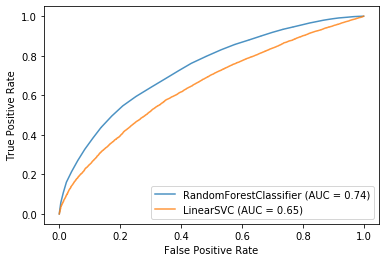

In [42]:
# Plot the Random Forest model vs SVM
ax = plt.gca()
rfc_disp = plot_roc_curve(rf, X_test, y_test, ax=ax, alpha=0.8)
svm_disp.plot(ax=ax, alpha=0.8)

In [31]:
svc = LinearSVC(random_state=123)
svc.fit(X_train, y_train)
svc_disp = plot_roc_curve(svc, X_test, y_test)


NameError: name 'SVCLinear' is not defined

In [ ]:
# Ramdom forest classifier 
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)

In [ ]:

X, y = datasets.make_classification(random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
metrics.det_curve(clf, X_test, y_test)  
plt.show()         

In [ ]:
import scikitplot as skplt
rf = RandomForestClassifier()
lr = LogisticRegression()
nb = GaussianNB()
svm = LinearSVC()
rf_probas = rf.fit(X_train, y_train).predict_proba(X_test)
lr_probas = lr.fit(X_train, y_train).predict_proba(X_test)
nb_probas = nb.fit(X_train, y_train).predict_proba(X_test)
svm_scores = svm.fit(X_train, y_train).decision_function(X_test)
probas_list = [rf_probas, lr_probas, nb_probas, svm_scores]
clf_names = ['Random Forest', 'Logistic Regression',
              'Gaussian Naive Bayes', 'Support Vector Machine']
skplt.metrics.plot_calibration_curve(y_test,
                                      probas_list,
                                     clf_names)
plt.show()

In [ ]:
from sklearn import metrics
metrics.det_curve(clf, X_test, y_test)  
plt.show() 